In [ ]:
# Sumani
# 8-8-2024

# Building and Training a CNN model on MNIST Dataset Using PyTorch

In this notebook, we will walk through the process of building, training, and evaluating a Convolutional Neural Network (CNN) for classifying handwritten digits from the MNIST dataset using PyTorch. We'll cover data loading and preprocessing, model definition, training, evaluation, and visualization of the results.

## Introduction

The MNIST dataset contains 70,000 grayscale images of handwritten digits (0-9), each of size 28x28 pixels. The dataset is divided into 60,000 training images and 10,000 test images. The goal is to classify each image into one of the 10 digit classes.


## Import Libraries

In [7]:
# Import the necessary libraries
import torch # PyTorch library for deep learning
import torch.nn as nn # PyTorch library for neural networks     
import torch.nn.functional as F # PyTorch library for neural network functions
import torch.optim as optim # PyTorch library for optimization
import torchvision # PyTorch library for computer vision
import torchvision.transforms as transforms # PyTorch library for image transformations
import matplotlib.pyplot as plt # PyTorch library for plotting
import numpy as np # PyTorch library for numerical operations
from sklearn.metrics import confusion_matrix # PyTorch library for confusion matrix
import seaborn as sns # PyTorch library for plotting
import pandas as pd # PyTorch library for data manipulation

# Step 1: Data Loading and Preprocessing

We'll start by defining the transformations to apply to the images and loading the MNIST dataset.

#### MNIST Dataset

The MNIST (Modified National Institute of Standards and Technology) dataset is a large database of handwritten digits that is commonly used for training various image processing systems. The dataset contains 70,000 images of handwritten digits (0-9) with 60,000 images in the training set and 10,000 images in the test set. Each image is a 28x28 grayscale image, meaning each pixel value ranges from 0 (black) to 255 (white). The dataset is well-suited for training and testing machine learning models in image recognition tasks, and it has become a standard benchmark for evaluating algorithms.



#### torch.utils.data.DataLoader

torch.utils.data.DataLoader is a utility in PyTorch that provides an efficient way to load and preprocess data. It allows for easy batching, shuffling, and parallel data loading using multiple workers. Key features include:

1. `Batching`: Automatically groups data into batches.
2. `Shuffling`: Randomizes the order of data samples, which is important for training neural networks.
3. `Parallel Loading`: Utilizes multiple CPU cores to load data in parallel, reducing the time spent on data loading.

DataLoader is essential for handling large datasets and ensuring efficient data feeding during the training and evaluation of models.

In [ ]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]) # Convert to tensor and normalize to [-1, 1], 0.5 is the mean and 0.5 is the standard deviation


# Load datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform) # Download the training set        
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True) # Load the training set

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform) # Download the test set
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False) # Load the test set

# Define classes
classes = [str(i) for i in range(10)] # Define the classes

100%|██████████| 9.91M/9.91M [00:37<00:00, 263kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 89.4kB/s]
100%|██████████| 1.65M/1.65M [00:03<00:00, 498kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.13MB/s]


# Step 2: Exploratory Data Analysis (EDA)

Let's visualize some sample images from the MNIST dataset.

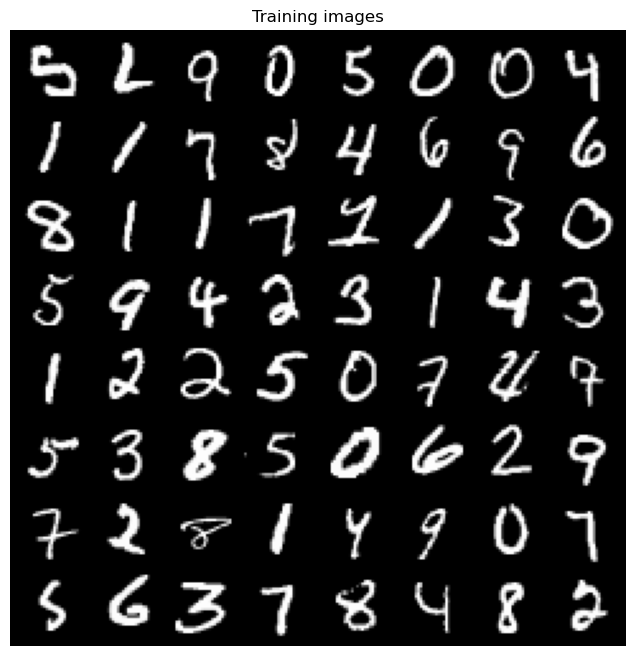

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision.utils as vutils

real_batch = next(iter(trainloader))
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(
    np.transpose(
        vutils.make_grid(real_batch[0][:64], padding=2, normalize=True), (1, 2, 0)
    )
)
plt.show()

# Step 3: Define the Neural Network Model

We will define a simple fully connected neural network with two layers.

In [ ]:
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1) # 1 input channel, 32 output channels, 3x3 kernel, padding=1, 32 filters    
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1) # 32 input channels, 64 output channels, 3x3 kernel, padding=1, 64 filters
        self.pool = nn.MaxPool2d(2, 2) # 2x2 max pooling 
        self.fc1 = nn.Linear(64 * 7 * 7, 128) # 64 * 7 * 7 input features, 128 output features, 128 neurons
        self.fc2 = nn.Linear(128, 10) # 128 input features, 10 output features
        self.dropout = nn.Dropout(0.5) # dropout layer, 50% dropout

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 1st convolution layer, input x pass to the conv1 layer, then pass to the relu function, then pass to the max pooling layer
        x = self.pool(F.relu(self.conv2(x))) # 2nd convolution layer, input x pass to the conv2 layer, then pass to the relu function, then pass to the max pooling layer
        x = x.view(-1, 64 * 7 * 7) # flatten the output of the convolution layers, 64 * 7 * 7 input features
        x = F.relu(self.fc1(x)) # 1st fully connected layer, input x pass to the fc1 layer, then pass to the relu function
        x = self.dropout(x) # dropout layer, 50% dropout
        x = self.fc2(x) # 2nd fully connected layer, input x pass to the fc2 layer
        return x

model = MNISTModel()

In [ ]:
# Create an instance of the model
torch.manual_seed(42) # Set the random seed to 42
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Set the device to cuda if available, otherwise set to cpu
model = MNISTModel() # Create an instance of the model
model = model.to(device) # Move the model to the device
print(model) # Print the model

MNISTModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


# Step 4: Define the Loss Function and Optimizer

We'll use cross-entropy loss and stochastic gradient descent (SGD) optimizer.

#### CrossEntropyLoss

CrossEntropyLoss is a commonly used loss function for classification problems in neural networks. It combines LogSoftmax and NLLLoss (negative log-likelihood loss) in a single class. CrossEntropyLoss is particularly useful for multi-class classification tasks.

#### Adam

The Adam optimizer is a versatile and powerful choice for training deep learning models. Its adaptive learning rate, moment estimation, and bias correction features make it suitable for a wide range of tasks and datasets, offering efficient and effective optimization.

* Efficient: Adam requires only first-order gradients (derivatives) and has a low memory footprint, making it computationally efficient.



In [8]:
# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 5: Training the Model

We train the model and store the training and test losses for each epoch.

In [10]:
num_epochs = 3
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        train_accuracy = 100 * correct / total

        if (i + 1) % 200 == 0:
            print(f'Epoch {epoch+1}, Batch {i + 1}, Train Accuracy: {train_accuracy :.2f}')

    train_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss = test_loss / len(testloader)
    test_accuracy = 100 * correct / total
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

print('Finished Training')

Epoch 1, Batch 200, Train Accuracy: 94.89
Epoch 1, Batch 400, Train Accuracy: 95.38
Epoch 1, Batch 600, Train Accuracy: 95.85
Epoch 1, Train Loss: 0.1446, Train Accuracy: 95.85%, Test Loss: 0.0467, Test Accuracy: 98.59%
Epoch 2, Batch 200, Train Accuracy: 97.17
Epoch 2, Batch 400, Train Accuracy: 97.23
Epoch 2, Batch 600, Train Accuracy: 97.34
Epoch 2, Train Loss: 0.0919, Train Accuracy: 97.34%, Test Loss: 0.0404, Test Accuracy: 98.71%
Epoch 3, Batch 200, Train Accuracy: 97.76
Epoch 3, Batch 400, Train Accuracy: 97.82
Epoch 3, Batch 600, Train Accuracy: 97.92
Epoch 3, Train Loss: 0.0707, Train Accuracy: 97.92%, Test Loss: 0.0280, Test Accuracy: 99.05%
Finished Training


# Step 6: Evaluating the Model

We'll define a function to evaluate the model on the test dataset.

In [11]:
# Define a function to calculate accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, 1)
    return torch.sum(preds == labels).item() / len(labels)

In [12]:
# Define the test loop
def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_acc = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            test_acc += accuracy(outputs, labels)
            all_preds.extend(outputs.argmax(dim=1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    print(f'Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_acc / len(test_loader):.4f}')
    return all_preds, all_labels

# Test the model
all_preds, all_labels = test(model, device, testloader, criterion)


Test Loss: 0.0280, Test Accuracy: 0.9905


# Step 7: Visualization

## Visualize Training and Test Loss

We plot the training and test losses over epochs.

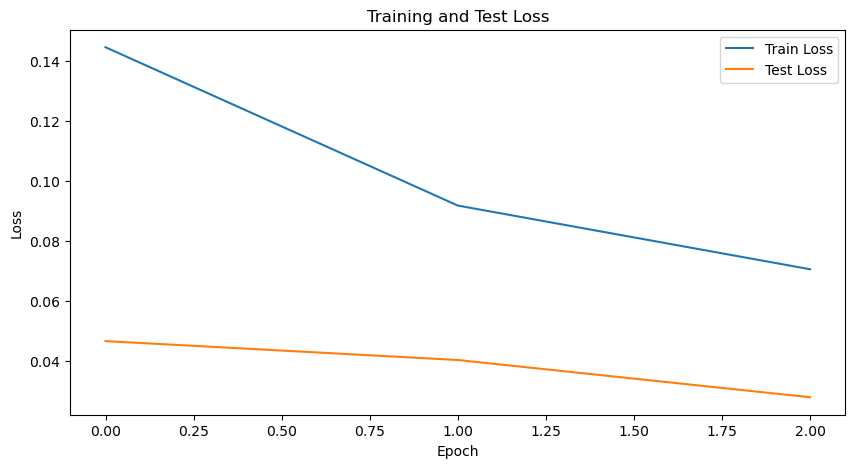

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss')
plt.show()

## Visualize Training and Test Accuracy

We plot the training and test accuracies over epochs.

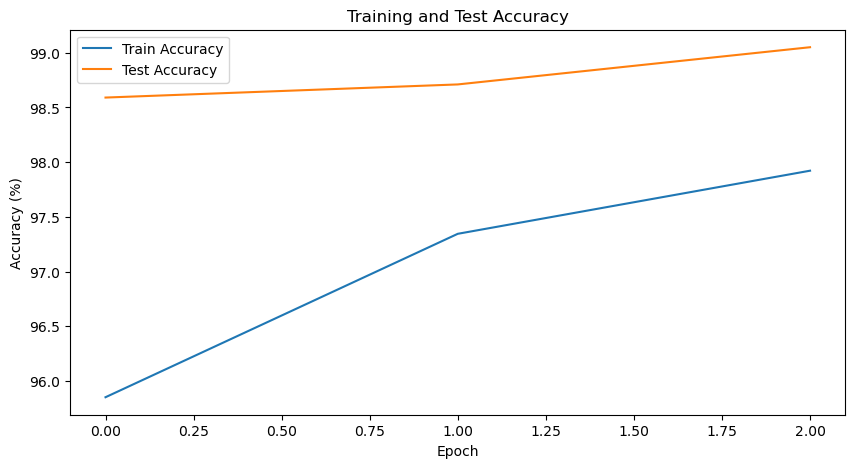

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Training and Test Accuracy')
plt.show()

## Visualizing Predictions

Finally, let's visualize some sample predictions from the model.

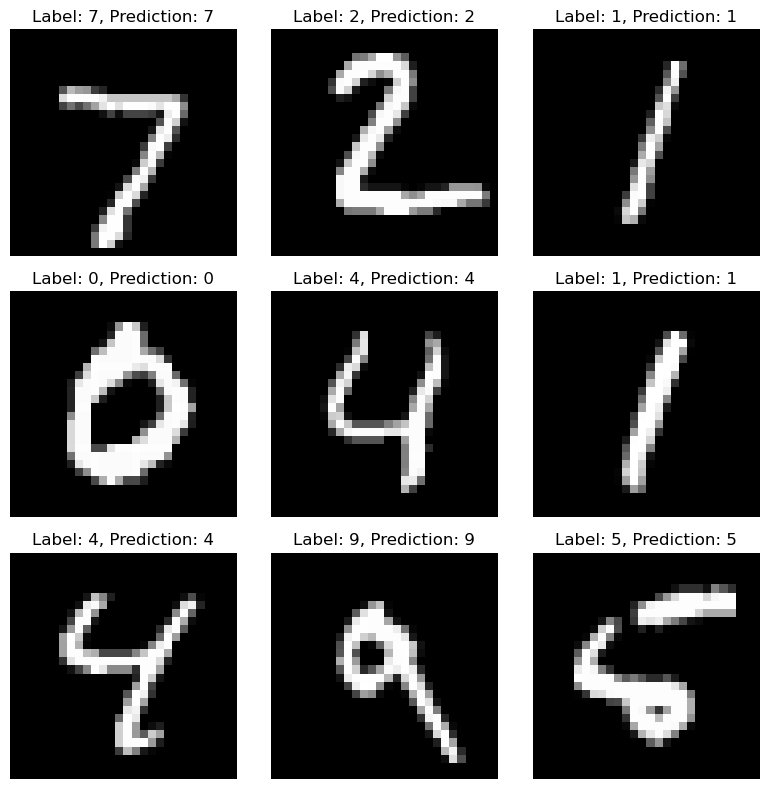

In [15]:
# Visualize some sample images and predictions
samples, labels = next(iter(testloader))
samples, labels = samples.to(device), labels.to(device)
outputs = model(samples)
_, preds = torch.max(outputs, 1)
samples = samples.cpu().numpy()
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(samples[i].squeeze(), cmap='gray')
    ax.set_title(f'Label: {labels[i]}, Prediction: {preds[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


## Visualizing Incorrect Predictions

Finally, let's visualize some sample predictions from the model.

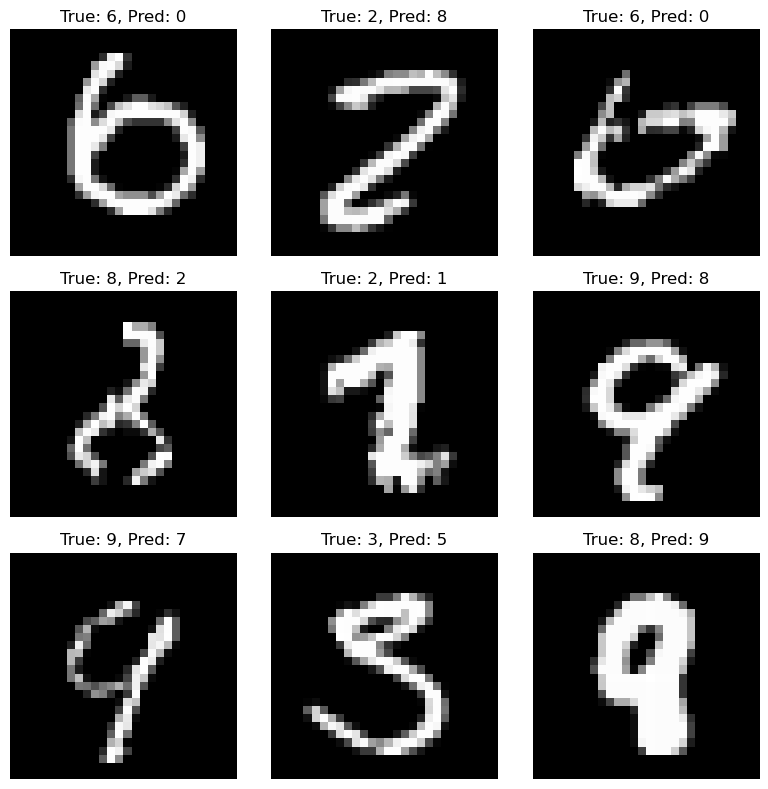

In [16]:
# Visualize incorrect predictions
incorrect = [i for i in range(len(all_preds)) if all_preds[i] != all_labels[i]]

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    idx = incorrect[i]
    ax.imshow(testloader.dataset[idx][0][0], cmap='gray')
    ax.set_title(f'True: {all_labels[idx]}, Pred: {all_preds[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## Evaluate the Model with a Confusion Matrix

We compute the confusion matrix for the test set.

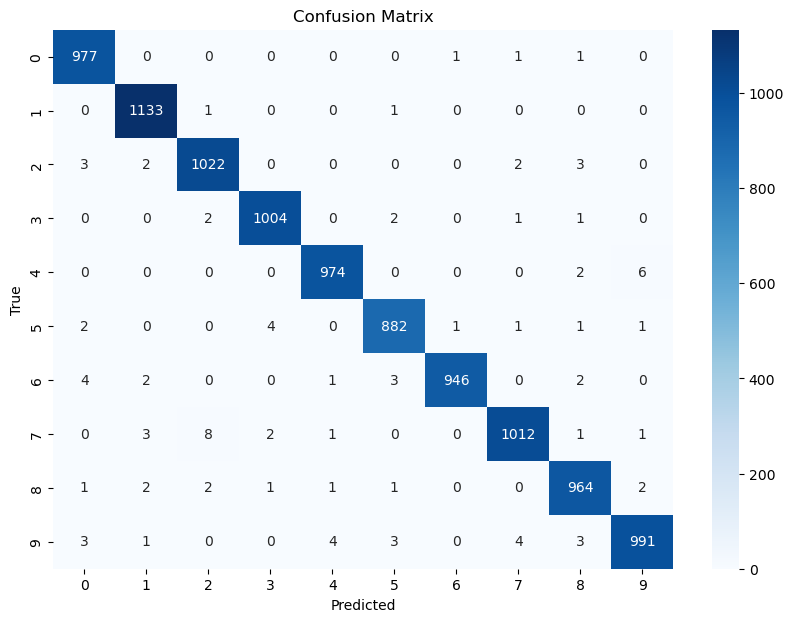

In [17]:
all_labels = []
all_predicted = []

model.eval()
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())

conf_matrix = confusion_matrix(all_labels, all_predicted)
df_cm = pd.DataFrame(conf_matrix, index=classes, columns=classes)

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
